In [27]:
import plotly.express as px
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
# Leer archivo bosch_aic_datathon_limpio.csv
data = pd.read_csv("bosch_aic_datathon_limpio.csv")

data.head()

,POSICIÓN,AREA,Á.LIQ.,GRUPO DE PERSONAL,CODIGO POSTAL,MOTIVO DE LA RENUNCIA,BANDA,BAJA,REGLAPHT,ALTA,...,LUGAR DE NACIMIENTO,NACIONALIDAD,EDAD,¿CUANTO TIEMPO TIENE VIVIENDO EN CD. JUAREZ?,ESTADO CIVIL,HIJOS,Distancia,TIEMPO VIVIENDO EN CD JUAREZ - CATEGORIA,TIENE HIJOS,TIPO DE RENUNCIA
0,POS514,LOG,S6,Exempt,32520,OTRO EMPLEO,E3,2023-01-02,ADMINIST,2018-06-21,...,CHIHUAHUA,Mexican,31,NaN,Soltero,0,10.815469,Menos de 1 Año,No,VOLUNTARIA
1,POS1745,MFS,S5,Direct,32217,OTRO EMPLEO,DNO,2023-01-03,ADMINIST,2017-07-20,...,DURANGO,Mexican,25,10+ Years,Soltero,0,18.258464,10+ Años,No,VOLUNTARIA
2,POS1230,VS7,S5,Direct,32600,OTRO EMPLEO,DNO,2023-01-03,JT012324,2019-08-29,...,CHIHUAHUA,Mexican,23,10+ Years,Soltero,0,18.460211,10+ Años,No,VOLUNTARIA
3,POS1661,MFS,S5,Direct,32575,ESTUDIOS,DO,2023-01-03,JT012324,2022-11-03,...,CHIHUAHUA,Mexican,18,10+ Years,Soltero,0,6.025403,10+ Años,No,VOLUNTARIA
4,POS1921,MFS,S5,Direct,32575,CAMBIO DE DOMICILIO,DO,2023-01-03,JT012324,2017-03-02,...,CHIHUAHUA,Mexican,26,10+ Years,Soltero,0,6.025403,10+ Años,No,VOLUNTARIA


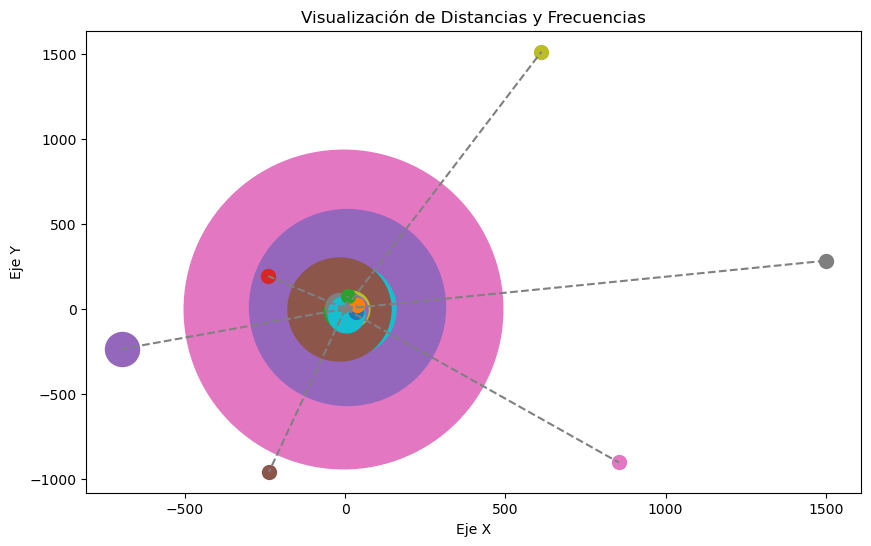

In [29]:
# Distribución de Categorías Salariales por Género
df = data[['BANDA', 'SEXO']]
conteo_banda = df.groupby(['SEXO', 'BANDA']).size().reset_index(name='conteo')
fig = px.bar(conteo_banda, x='BANDA', y='conteo', color='SEXO', 
             barmode='group', 
             title='Distribución de Categorías Salariales por Género',
             labels={'conteo': 'Frecuencia', 'BANDA': 'Categoría Salarial'})

fig.show()


# Distribución de Categorías de Áreas por Género
df = data[['AREA', 'SEXO']]
conteo_banda = df.groupby(['SEXO', 'AREA']).size().reset_index(name='conteo')

fig = px.bar(conteo_banda, x='conteo', y='AREA', color='SEXO', 
             barmode='group', 
             title='Distribución de Categorías de Áreas por Género',
             labels={'conteo': 'Frecuencia', 'AREA': 'Categoría de Área'})
fig.show()

#Distancia
distancias = np.array(data['Distancia'])

valores, frecuencias = np.unique(distancias, return_counts=True)

plt.figure(figsize=(10, 6))
for i in range(len(valores)):
    plt.scatter(x=np.cos(i)*valores[i], y=np.sin(i)*valores[i], s=frecuencias[i]*100, label=f'{valores[i]}: {frecuencias[i]}')

plt.scatter(0, 0, color='red', s=10)

for i in range(len(valores)):
    plt.plot([0, np.cos(i)*valores[i]], [0, np.sin(i)*valores[i]], color='grey', linestyle='--')

plt.title('Visualización de Distancias y Frecuencias')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.show()


#SEXO
conteo_sexo = data['SEXO'].value_counts().reset_index()
conteo_sexo.columns = ['SEXO', 'conteo']

fig = px.bar(conteo_sexo, x='SEXO', y='conteo',
             title='Distribución por Género',
             labels={'conteo': 'Frecuencia', 'SEXO': 'Género'})
fig.show()


#EDAD
fig = px.histogram(data, x='EDAD', nbins=10, 
                   title='Distribución de Edad',
                   labels={'EDAD': 'Edad'},
                   marginal='box')  # Puedes quitar 'marginal' si no deseas el diagrama de caja
fig.show()

conteo_estado_civil = data['ESTADO CIVIL'].value_counts().reset_index()
conteo_estado_civil.columns = ['ESTADO CIVIL', 'conteo']

# ESTADO CIVIL
fig = px.bar(conteo_estado_civil, x='ESTADO CIVIL', y='conteo',
             title='Distribución por Estado Civil',
             labels={'conteo': 'Frecuencia', 'ESTADO CIVIL': 'Estado Civil'})

fig.show()


#HIJOS
conteo_hijos = data['HIJOS'].value_counts().reset_index()
conteo_hijos.columns = ['HIJOS', 'conteo']

fig = px.bar(conteo_hijos, x='HIJOS', y='conteo',
             title='Distribución del Número de Hijos',
             labels={'conteo': 'Frecuencia', 'HIJOS': 'Número de Hijos'})

fig.show()

#TIENE hijo si no
conteo_tiene_hijos = data['TIENE HIJOS'].value_counts().reset_index()
conteo_tiene_hijos.columns = ['TIENE HIJOS', 'conteo']

fig = px.bar(conteo_tiene_hijos, x='TIENE HIJOS', y='conteo',
             title='Distribución de Personas con y sin Hijos',
             labels={'conteo': 'Frecuencia', 'TIENE HIJOS': 'Tiene Hijos'})

fig.show()


# Calcula el conteo de cada combinación de 'BANDA' y 'TIPO RENUNCIA'
conteo_banda_tipo = data.groupby(['BANDA', 'TIPO DE RENUNCIA']).size().reset_index(name='conteo')

# Crea un gráfico de barras con Plotly Express
fig1 = px.bar(conteo_banda_tipo, x='BANDA', y='conteo', color='TIPO DE RENUNCIA', title='BANDA vs. TIPO DE RENUNCIA')

# Muestra el gráfico
fig1.show()


# Calcula el conteo de cada combinación de 'BANDA' y 'MOTIVO DE LA RENUNCIA'
conteo_banda_motivo = data.groupby(['BANDA', 'MOTIVO DE LA RENUNCIA']).size().reset_index(name='conteo')

# Crea un gráfico de barras con Plotly Express
fig2 = px.bar(conteo_banda_motivo, x='BANDA', y='conteo', color='MOTIVO DE LA RENUNCIA', title='BANDA vs. MOTIVO DE LA RENUNCIA')

# Muestra el gráfico
fig2.show()

# Gráfico para 'BANDA' y 'ANTIGÜEDAD'
fig3 = px.box(data, x='BANDA', y='ANTIGÜEDAD', title='BANDA vs. ANTIGÜEDAD')
fig3.show()

#Relación entre antigüedad y distancia
fig = px.scatter(data, x='Distancia', y='ANTIGÜEDAD',
                 title='Relación entre Distancia y Antigüedad',
                 labels={'Distancia': 'Distancia', 'Antigüedad': 'Antigüedad'})

# Mostrar el gráfico
fig.show()

#Graficas para saber en que trimestre se contratron más personas y en que trimestre hubo m'as bajas
data['ALTA'] = pd.to_datetime(data['ALTA'], errors='coerce')
data['BAJA'] = pd.to_datetime(data['BAJA'], errors='coerce')

# Extraer el trimestre y convertir a string
data['Trimestre Alta'] = data['ALTA'].dt.to_period('Q').astype(str)
data['Trimestre Baja'] = data['BAJA'].dt.to_period('Q').astype(str)

# Conteo de contrataciones por trimestre
contrataciones_por_trimestre = data['Trimestre Alta'].value_counts().reset_index()
contrataciones_por_trimestre.columns = ['Trimestre', 'Contrataciones']

# Gráfico de contrataciones
fig1 = px.bar(contrataciones_por_trimestre, x='Trimestre', y='Contrataciones',
              title='Contrataciones por Trimestre')
fig1.show()

# Conteo de bajas por trimestre
bajas_por_trimestre = data['Trimestre Baja'].value_counts().reset_index()
bajas_por_trimestre.columns = ['Trimestre', 'Bajas']

# Gráfico de bajas
fig2 = px.bar(bajas_por_trimestre, x='Trimestre', y='Bajas',
              title='Bajas por Trimestre')
fig2.show()